# Problem 1

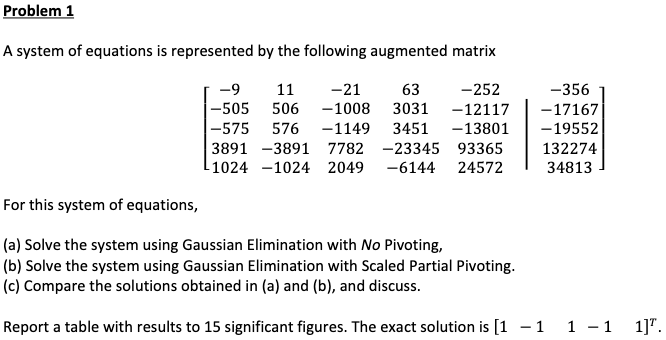

## a)

In [1]:
import numpy as np

# Set precision for floating point numbers, arrays and other NumPy objects
np.set_printoptions(precision=15)

# Define matrix A
A=np.array([[-9,11,-21,63,-252],
            [-505,506,-1008,3031,-12117],
            [-575,576,-1149,3451,-13801],
            [3891,-3891,7782,-23345,93365],
            [1024,-1024,2049,-6144,24572]], float)

A

array([[-9.0000e+00,  1.1000e+01, -2.1000e+01,  6.3000e+01, -2.5200e+02],
       [-5.0500e+02,  5.0600e+02, -1.0080e+03,  3.0310e+03, -1.2117e+04],
       [-5.7500e+02,  5.7600e+02, -1.1490e+03,  3.4510e+03, -1.3801e+04],
       [ 3.8910e+03, -3.8910e+03,  7.7820e+03, -2.3345e+04,  9.3365e+04],
       [ 1.0240e+03, -1.0240e+03,  2.0490e+03, -6.1440e+03,  2.4572e+04]])

In [2]:
# Define matrix B
B=np.array([-356,-17167,-19552,132274,34813], float)
B

array([  -356., -17167., -19552., 132274.,  34813.])

In [3]:
n = len(B)
n

5

In [4]:
# Gauss Elimination with No Pivoting

# Forward Elimination
for row in range(0, n-1):
    for i in range(row+1, n):
        factor = A[i,row] / A[row,row]
        print(f'Factor is {factor}')
        for j in range(row, n):
            A[i,j] = A[i,j] - factor * A[row,j]
            
        B[i] = B[i] - factor * B[row]
        print(f'A: {A}')
        print(f'B: {B}')

# Back Substitution
x1 = np.zeros((n,1))
x1[n-1] = B[n-1] / A[n-1, n-1]
for row in range(n-2, -1, -1):
    sums = B[row]
    for j in range(row+1, n):
        sums = sums - A[row,j] * x1[j]
    x1[row] = sums / A[row,row]
    
print('The solution of the given system is: ')
print(x1)

Factor is 56.111111111111114
A: [[-9.000000000000000e+00  1.100000000000000e+01 -2.100000000000000e+01
   6.300000000000000e+01 -2.520000000000000e+02]
 [ 0.000000000000000e+00 -1.112222222222223e+02  1.703333333333335e+02
  -5.040000000000000e+02  2.023000000000000e+03]
 [-5.750000000000000e+02  5.760000000000000e+02 -1.149000000000000e+03
   3.451000000000000e+03 -1.380100000000000e+04]
 [ 3.891000000000000e+03 -3.891000000000000e+03  7.782000000000000e+03
  -2.334500000000000e+04  9.336500000000000e+04]
 [ 1.024000000000000e+03 -1.024000000000000e+03  2.049000000000000e+03
  -6.144000000000000e+03  2.457200000000000e+04]]
B: [  -356.                2808.5555555555584 -19552.
 132274.               34813.             ]
Factor is 63.888888888888886
A: [[-9.000000000000000e+00  1.100000000000000e+01 -2.100000000000000e+01
   6.300000000000000e+01 -2.520000000000000e+02]
 [ 0.000000000000000e+00 -1.112222222222223e+02  1.703333333333335e+02
  -5.040000000000000e+02  2.023000000000000e+0

$\pagebreak$

## b)

In [5]:
# Define matrix A
A=np.array([[-9,11,-21,63,-252],
            [-505,506,-1008,3031,-12117],
            [-575,576,-1149,3451,-13801],
            [3891,-3891,7782,-23345,93365],
            [1024,-1024,2049,-6144,24572]], float)

# Define matrix B
B=np.array([-356,-17167,-19552,132274,34813], float)

A,B

(array([[-9.0000e+00,  1.1000e+01, -2.1000e+01,  6.3000e+01, -2.5200e+02],
        [-5.0500e+02,  5.0600e+02, -1.0080e+03,  3.0310e+03, -1.2117e+04],
        [-5.7500e+02,  5.7600e+02, -1.1490e+03,  3.4510e+03, -1.3801e+04],
        [ 3.8910e+03, -3.8910e+03,  7.7820e+03, -2.3345e+04,  9.3365e+04],
        [ 1.0240e+03, -1.0240e+03,  2.0490e+03, -6.1440e+03,  2.4572e+04]]),
 array([  -356., -17167., -19552., 132274.,  34813.]))

In [6]:
# Gaussian Elimination with Scaled Partial Pivoting
# Define Number of rows n
n = len(B)

# Initialize Scaling factors to 0
s = np.zeros(n)

for i in range(n):
    # Max value in each row of A
    s[i] = max(np.abs(A[i,:])) 
#Select pivot row
for k in range(0, n-1): 
    # Interchange rows
    # Calculate max item for each col k, and scale by s
    p = np.argmax(np.abs(A[k:n,k])/s[k:n]) 
    # swap rows
    r = np.array([1,2,3,4],int)
    if p != k: 
        A[[k,p+k],:] = A[[p+k, k],:]
        print('A = ',A)
        B[k],B[p+k] = B[p+k],B[k]
        print('B = ',B)
        s[k],s[p+k] = s[p+k],s[k]
        print('s = ',s)
        r[k],r[p+k] = r[p+k],r[k]
        print('r = ',r)
        print()

    # Elimination phase
    for i in range(k+1,n):
        # skip if a(i,k) is already zero
        if A[i,k] != 0.0: 
            lam = A[i,k]/A[k,k] 
            A[i,k:n] = A[i,k:n] - lam*A[k,k:n]
            B[i] = B[i] - lam*B[k]

    # Back substitution phase
    x = np.zeros_like(B)
    x[n-1] = B[n-1]/A[n-1,n-1]
    for k in range(n-2,-1,-1):
        x[k] = (B[k] - np.dot(A[k,k+1:n],x[k+1:n]))/A[k,k]

print('The solution of the given system is: ')
print(x)

A =  [[-5.0500e+02  5.0600e+02 -1.0080e+03  3.0310e+03 -1.2117e+04]
 [-9.0000e+00  1.1000e+01 -2.1000e+01  6.3000e+01 -2.5200e+02]
 [-5.7500e+02  5.7600e+02 -1.1490e+03  3.4510e+03 -1.3801e+04]
 [ 3.8910e+03 -3.8910e+03  7.7820e+03 -2.3345e+04  9.3365e+04]
 [ 1.0240e+03 -1.0240e+03  2.0490e+03 -6.1440e+03  2.4572e+04]]
B =  [-17167.   -356. -19552. 132274.  34813.]
s =  [12117.   252. 13801. 93365. 24572.]
r =  [2 1 3 4]

A =  [[-5.050000000000000e+02  5.060000000000000e+02 -1.008000000000000e+03
   3.031000000000000e+03 -1.211700000000000e+04]
 [ 0.000000000000000e+00  1.982178217821783e+00 -3.035643564356437e+00
   8.982178217821790e+00 -3.605346534653467e+01]
 [ 0.000000000000000e+00 -1.386138613860339e-01 -1.277227722772295e+00
  -1.386138613856929e-01 -4.415841584159352e+00]
 [ 0.000000000000000e+00  7.704950495049161e+00  1.540990099009923e+01
   8.704950495048251e+00  4.114851485152030e+00]
 [ 0.000000000000000e+00  2.027722772277230e+00  5.055445544554459e+00
   2.0277227722772

$\pagebreak$

## c)

| Exact Solution | Gauss Elimination with No Pivoting | Gauss Elimination with Scaled Partial Pivoting |
| --- | --- | --- |
| 1 | 1.000000000003407 | 0.999999999997781 |
| -1 | -1.000000000010188 | -0.999999999993247 |
| 1 | 1.000000000004355 | 0.999999999996146 |
| -1 | -0.999999999995465 | -0.99999999999972 |
| 1 | 1.000000000000204 | 1.000000000000765 |

$\pagebreak$

# Problem 2

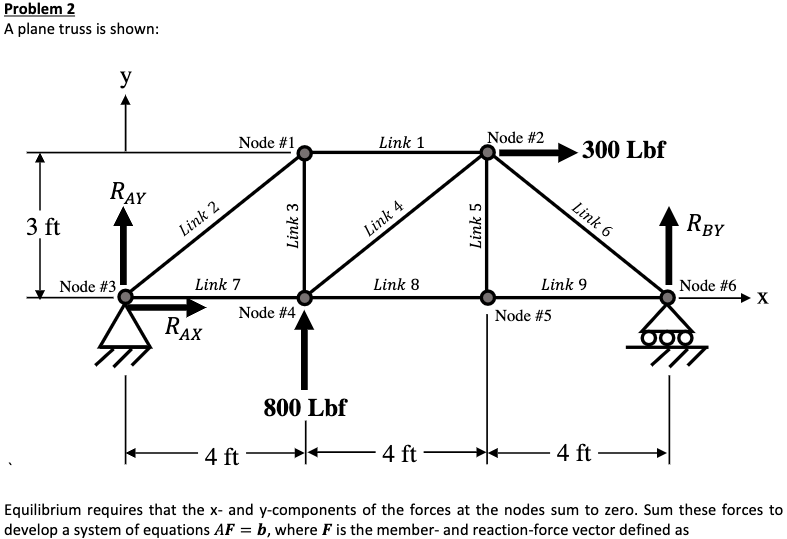

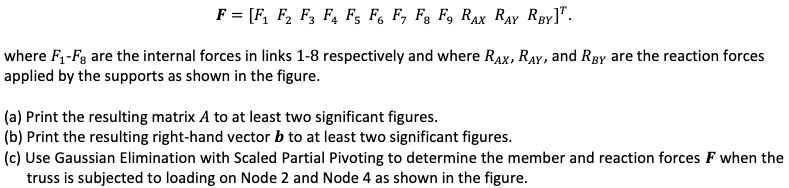

## a)

# FBD Will Go Here

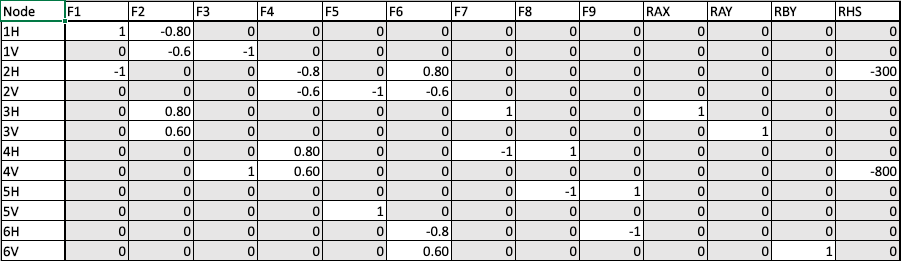

In [7]:
import numpy as np
np.set_printoptions(precision=2)
# Define matrix A
A=np.array([[1.,-0.80,0,0,0,0,0,0,0,0,0,0],#1H
            [0,-0.60,-1.,0,0,0,0,0,0,0,0,0],#1V
            [-1.,0,0,-0.80,0,0.80,0,0,0,0,0,0],#2H
            [0,0,0,-0.6,-1.,-0.6,0,0,0,0,0,0],#2V
            [0,0.8,0,0,0,0,1.,0,0,1.,0,0],#3H
            [0,0.6,0,0,0,0,0,0,0,0,1.,0],#3V
            [0,0,0,0.8,0,0,-1.,1.,0,0,0,0],#4H
            [0,0,1.,0.6,0,0,0,0,0,0,0,0],#4V
            [0,0,0,0,0,0,0,-1.,1.,0,0,0],#5H
            [0,0,0,0,1,0,0,0,0,0,0,0],#5V
            [0,0,0,0,0,-0.8,0,0,-1,0,0,0],#6H
            [0,0,0,0,0,0.6,0,0,0,0,0,1.]#6v          
          ])

A

array([[ 1. , -0.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. , -0.6, -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [-1. ,  0. ,  0. , -0.8,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. , -0.6, -1. , -0.6,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0.8,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,
         0. ],
       [ 0. ,  0.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0.8,  0. ,  0. , -1. ,  1. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  1. ,  0.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  1. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.8,  0. ,  0. , -1. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  

$\pagebreak$

## b)

In [8]:
# Define matrix B
B=np.array([0,0,-300.,0,0,0,0,-800.,0,0,0,0])
B

array([   0.,    0., -300.,    0.,    0.,    0.,    0., -800.,    0.,
          0.,    0.,    0.])

$\pagebreak$

## c)

In [9]:
# Gaussian Elimination with Scaled Partial Pivoting
# Define Number of rows n
n = len(B)

# Initialize Scaling factors to 0
s = np.zeros(n)

for i in range(n):
    # Max value in each row of A
    s[i] = max(np.abs(A[i,:])) 
#Select pivot row
for k in range(0, n-1): 
    # Interchange rows
    # Calculate max item for each col k, and scale by s
    p = np.argmax(np.abs(A[k:n,k])/s[k:n]) 
    # swap rows
    r = np.array([1,2,3,4],int)
    if p != k: 
        A[[k,p+k],:] = A[[p+k, k],:]
        print('A = ',A)
        B[k],B[p+k] = B[p+k],B[k]
        print('B = ',B)
        s[k],s[p+k] = s[p+k],s[k]
        print('s = ',s)
        #r[k],r[p+k] = r[p+k],r[k]
        #print('r = ',r)
        print()

    # Elimination phase
    for i in range(k+1,n):
        # skip if a(i,k) is already zero
        if A[i,k] != 0.0: 
            lam = A[i,k]/A[k,k] 
            A[i,k:n] = A[i,k:n] - lam*A[k,k:n]
            B[i] = B[i] - lam*B[k]

    # Back substitution phase
    x = np.zeros_like(B)
    x[n-1] = B[n-1]/A[n-1,n-1]
    for k in range(n-2,-1,-1):
        x[k] = (B[k] - np.dot(A[k,k+1:n],x[k+1:n]))/A[k,k]

print('The solution of the given system is: ')
print(x)

A =  [[ 1.   -0.8   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.6  -1.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.33 -0.8   0.    0.8   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.6  -1.   -0.6   0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -1.33  0.    0.    0.    1.    0.    0.    1.    0.    0.  ]
 [ 0.    0.   -1.    0.    0.    0.    0.    0.    0.    0.    1.    0.  ]
 [ 0.    0.    0.    0.8   0.    0.   -1.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.6   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -1.    1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.8   0.    0.   -1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.6   0.    0.    0.    0.    0.    1.  ]]
B =  [   0.    0. -300.    0.    0.    0.    0. -800.    0.    0.    0.    0.]
s =  [1. 1. 1. 

/apps/share64/debian7/anaconda/anaconda3-5.1/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/apps/share64/debian7/anaconda/anaconda3-5.1/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


$\pagebreak$

# Problem 3

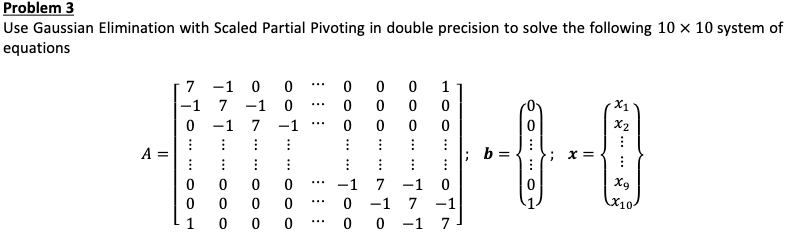

In [10]:
import numpy as np
np.set_printoptions(precision=2)
# Define matrix A
A = np.array([[7.,-1.,0.,0.,0.,0.,0.,0.,0.,1.],#R1
             [-1.,7.,-1.,0.,0.,0.,0.,0.,0.,0.],#R2
             [0.,-1.,7.,-1.,0.,0.,0.,0.,0.,0.],#R3
             [0.,0.,-1.,7.,-1.,0.,0.,0.,0.,0.],#R4
             [0.,0.,0.,-1.,7.,-1.,0.,0.,0.,0.],#R5
             [0.,0.,0.,0.,-1.,7.,-1.,0.,0.,0.],#R6
             [0.,0.,0.,0.,0.,-1.,7.,-1.,0.,0.],#R7
             [0.,0.,0.,0.,0.,0.,-1.,7.,-1.,0.],#R8
             [0.,0.,0.,0.,0.,0.,0.,-1.,7.,-1.],#R9
             [1.,0.,0.,0.,0.,0.,0.,0.,-1.,7.]]) #R10

A

array([[ 7., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [-1.,  7., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  7., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  7., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  7., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  7., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  7., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  7., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  7., -1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  7.]])

In [11]:
# Define matrix B
B=np.array([0,0,0,0,0,0,0,0,0,1.])
B

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [12]:
# Gaussian Elimination with Scaled Partial Pivoting
# Define Number of rows n
n = len(B)

# Initialize Scaling factors to 0
s = np.zeros(n)

for i in range(n):
    # Max value in each row of A
    s[i] = max(np.abs(A[i,:])) 
#Select pivot row
for k in range(0, n-1): 
    # Interchange rows
    # Calculate max item for each col k, and scale by s
    p = np.argmax(np.abs(A[k:n,k])/s[k:n]) 
    # swap rows
    r = np.array([1,2,3,4],int)
    if p != k: 
        A[[k,p+k],:] = A[[p+k, k],:]
        print('A = ',A)
        B[k],B[p+k] = B[p+k],B[k]
        print('B = ',B)
        s[k],s[p+k] = s[p+k],s[k]
        print('s = ',s)
        #r[k],r[p+k] = r[p+k],r[k]
        #print('r = ',r)
        print()

    # Elimination phase
    for i in range(k+1,n):
        # skip if a(i,k) is already zero
        if A[i,k] != 0.0: 
            lam = A[i,k]/A[k,k] 
            A[i,k:n] = A[i,k:n] - lam*A[k,k:n]
            B[i] = B[i] - lam*B[k]

    # Back substitution phase
    x = np.zeros_like(B)
    x[n-1] = B[n-1]/A[n-1,n-1]
    for k in range(n-2,-1,-1):
        x[k] = (B[k] - np.dot(A[k,k+1:n],x[k+1:n]))/A[k,k]

print('The solution of the given system is: ')
np.set_printoptions(precision=2,suppress=True)
print(x)

A =  [[ 7.   -1.    0.    0.    0.    0.    0.    0.    0.    1.  ]
 [ 0.    6.86 -1.    0.    0.    0.    0.    0.    0.    0.14]
 [ 0.   -1.    7.   -1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -1.    7.   -1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -1.    7.   -1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -1.    7.   -1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -1.    7.   -1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -1.    7.   -1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -1.    7.   -1.  ]
 [ 0.    0.14  0.    0.    0.    0.    0.    0.   -1.    6.86]]
B =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
s =  [7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]

A =  [[ 7.   -1.    0.    0.    0.    0.    0.    0.    0.    1.  ]
 [ 0.    6.86 -1.    0.    0.    0.    0.    0.    0.    0.14]
 [ 0.    0.    6.85 -1.    0.    0.    0.    0.    0.    0.02]
 [ 0.    0.   -1.    7.   -1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -1.    7.   

$\pagebreak$

# Problem 4

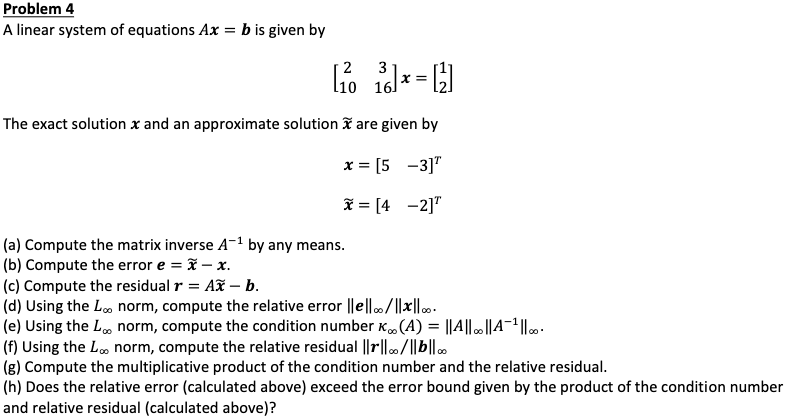

## a)

In [13]:
import numpy as np
# Define matrix A
A = np.array([[2,3],[10,16]])
A

array([[ 2,  3],
       [10, 16]])

In [14]:
# Calculating the inverse of the matrix
A_inverse = np.linalg.inv(A)
A_inverse

array([[ 8. , -1.5],
       [-5. ,  1. ]])

$\pagebreak$

## b)

In [15]:
x = np.array([[5],[-3]])
x

array([[ 5],
       [-3]])

In [16]:
x_hat = np.array([[4],[-2]])
x_hat

array([[ 4],
       [-2]])

In [17]:
e = x_hat-x
e

array([[-1],
       [ 1]])

$\pagebreak$

## c)

In [18]:
b = np.array([[1],[2]])
b

array([[1],
       [2]])

In [19]:
r = np.dot(A,x_hat)-b
r

array([[1],
       [6]])

$\pagebreak$

## d)

In [20]:
e_norm_inf = np.linalg.norm(e, np.inf)
e_norm_inf

1.0

In [21]:
x_norm_inf = np.linalg.norm(x, np.inf)
x_norm_inf

5.0

In [22]:
rel_err = e_norm_inf/x_norm_inf
rel_err

0.2

$\pagebreak$

## e)

In [23]:
A_norm_inf = np.linalg.norm(A, np.inf)
A_norm_inf

26.0

In [24]:
A_inv_norm_inf = np.linalg.norm(A_inverse, np.inf)
A_inv_norm_inf

9.499999999999991

In [25]:
cond_num = A_norm_inf*A_inv_norm_inf
cond_num

246.99999999999977

$\pagebreak$

## f)

In [26]:
r_norm_inf = np.linalg.norm(r, np.inf)
r_norm_inf

6.0

In [27]:
b_norm_inf = np.linalg.norm(b, np.inf)
b_norm_inf

2.0

In [28]:
rel_res = r_norm_inf/b_norm_inf
rel_res

3.0

$\pagebreak$

## g)

In [29]:
mul_pro = cond_num*rel_res
mul_pro

740.9999999999993

$\pagebreak$

## h)

In [30]:
rel_err >= mul_pro

False

$\pagebreak$

# Problem 5

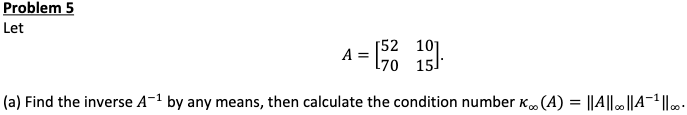

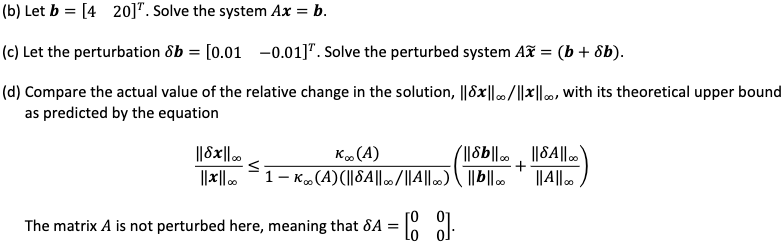

## a)

In [31]:
import numpy as np
# Define matrix A
A = np.array([[52,10],[70,15]])
A

array([[52, 10],
       [70, 15]])

In [32]:
# Calculating the inverse of the matrix
A_inverse = np.linalg.inv(A)
A_inverse

array([[ 0.19, -0.13],
       [-0.88,  0.65]])

In [33]:
A_norm_inf = np.linalg.norm(A, np.inf)
A_norm_inf

85.0

In [34]:
A_inv_norm_inf = np.linalg.norm(A_inverse, np.inf)
A_inv_norm_inf

1.5250000000000008

In [35]:
cond_num = A_norm_inf*A_inv_norm_inf
cond_num

129.62500000000006

$\pagebreak$

## b)

In [36]:
b = np.array([[4],[20]])
b

array([[ 4],
       [20]])

In [37]:
x = np.dot(A_inverse,b)
x

array([[-1.75],
       [ 9.5 ]])

$\pagebreak$

## c)

In [38]:
delta_b = np.array([[0.01],[-0.01]])
delta_b

array([[ 0.01],
       [-0.01]])

In [39]:
B = b+delta_b
B

array([[ 4.01],
       [19.99]])

In [40]:
x_tilde = np.dot(A_inverse,B)
x_tilde

array([[-1.75],
       [ 9.48]])

$\pagebreak$

## d)

In [41]:
x_norm_inf = np.linalg.norm(x, np.inf)
x_norm_inf

9.500000000000005

In [42]:
delta_x = x - x_tilde
delta_x

array([[-0.  ],
       [ 0.02]])

In [43]:
delta_x_norm_inf = np.linalg.norm(delta_x, np.inf)
delta_x_norm_inf

0.015249999999999986

In [44]:
lhs = delta_x_norm_inf/x_norm_inf
lhs

0.0016052631578947344

In [45]:
b_norm_inf = np.linalg.norm(b, np.inf)
b_norm_inf

20.0

In [46]:
delta_b_norm_inf = np.linalg.norm(delta_b, np.inf)
delta_b_norm_inf

0.01

In [47]:
ratio_b = delta_b_norm_inf/b_norm_inf
ratio_b

0.0005

In [48]:
delta_A = np.array([[0,0],[0,0]])
delta_A

array([[0, 0],
       [0, 0]])

In [49]:
delta_A_norm_inf = np.linalg.norm(delta_A, np.inf)
delta_A_norm_inf

0.0

In [50]:
ratio_a = delta_A_norm_inf/A_norm_inf
ratio_a

0.0

In [51]:
denom = 1 - cond_num*ratio_a
denom

1.0

In [52]:
rhs = (cond_num/denom)*(ratio_b+ratio_a)
rhs

0.06481250000000002

In [53]:
lhs<=rhs

True

* Hence, the relative change in the solution is less than the theoretical upper bound.

$\pagebreak$

# Problem 6

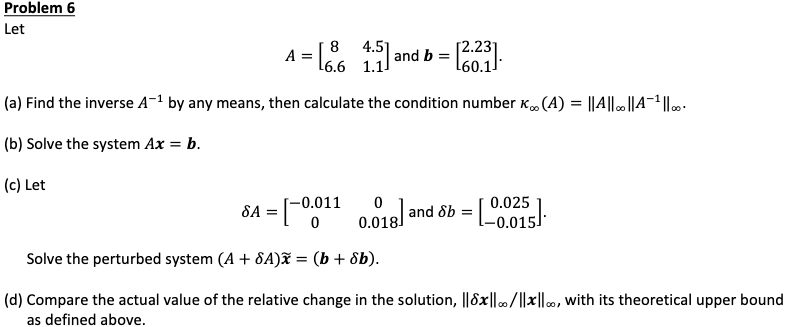

## a)

In [54]:
import numpy as np
# Define matrix A
A = np.array([[8,4.5],[6.6,1.1]])
A

array([[8. , 4.5],
       [6.6, 1.1]])

In [55]:
# Calculating the inverse of the matrix
A_inverse = np.linalg.inv(A)
A_inverse

array([[-0.05,  0.22],
       [ 0.32, -0.38]])

In [56]:
A_norm_inf = np.linalg.norm(A, np.inf)
A_norm_inf

12.5

In [57]:
A_inv_norm_inf = np.linalg.norm(A_inverse, np.inf)
A_inv_norm_inf

0.6985645933014354

In [58]:
cond_num = A_norm_inf*A_inv_norm_inf
cond_num

8.732057416267942

$\pagebreak$

## b)

In [59]:
b = np.array([[2.23],[60.1]])
b

array([[ 2.23],
       [60.1 ]])

In [60]:
# Solve for x
x = np.dot(A_inverse,b)
x

array([[ 12.82],
       [-22.3 ]])

$\pagebreak$

## c)

In [61]:
delta_A = np.array([[-0.011,0],[0,0.018]])
delta_A

array([[-0.01,  0.  ],
       [ 0.  ,  0.02]])

In [62]:
delta_b = np.array([[0.025],[-0.015]])
delta_b

array([[ 0.03],
       [-0.01]])

In [63]:
A_plus_delta_A = A+delta_A
A_plus_delta_A

array([[7.99, 4.5 ],
       [6.6 , 1.12]])

In [64]:
b_plus_delta_b = b+delta_b
b_plus_delta_b

array([[ 2.25],
       [60.09]])

In [65]:
A_plus_delta_A_inverse = np.linalg.inv(A_plus_delta_A)
A_plus_delta_A_inverse

array([[-0.05,  0.22],
       [ 0.32, -0.38]])

In [66]:
x_tilde = np.dot(A_plus_delta_A_inverse,b_plus_delta_b)
x_tilde

array([[ 12.9],
       [-22.4]])

$\pagebreak$

## d)

In [66]:
x_norm_inf = np.linalg.norm(x, np.inf)
x_norm_inf

22.300574162679425

In [67]:
delta_x = x - x_tilde
delta_x

array([[-0.07],
       [ 0.1 ]])

In [68]:
delta_x_norm_inf = np.linalg.norm(delta_x, np.inf)
delta_x_norm_inf

0.09587185326276426

In [69]:
lhs = delta_x_norm_inf/x_norm_inf
lhs

0.01009177402765939

In [70]:
b_norm_inf = np.linalg.norm(b, np.inf)
b_norm_inf

60.1

In [71]:
delta_b_norm_inf = np.linalg.norm(delta_b, np.inf)
delta_b_norm_inf

0.025

In [72]:
ratio_b = delta_b_norm_inf/b_norm_inf
ratio_b

0.00041597337770382697

In [73]:
delta_A_norm_inf = np.linalg.norm(delta_A, np.inf)
delta_A_norm_inf

0.018

In [74]:
ratio_a = delta_A_norm_inf/A_norm_inf
ratio_a

0.0014399999999999999

In [75]:
denom = 1 - cond_num*ratio_a
denom

0.9874258373205742

In [76]:
rhs = (cond_num/denom)*(ratio_b+ratio_a)
rhs

0.01641284386597738

In [77]:
lhs<=rhs

True

* Hence, the relative change in the solution is less than the theoretical upper bound.